# Setup

In [1]:
!pip install pycaret

  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1


In [2]:
!pip install joblib==1.0.1

  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.12.2 requires joblib>=1.1.1, but you have joblib 1.0.1 which is incompatible.
pycaret 3.3.2 requires joblib<1.4,>=1.2.0, but you have joblib 1.0.1 which is incompatible.
scikit-learn 1.4.2 requires joblib>=1.2.0, but you have joblib 1.0.1 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from pycaret.classification import *
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set_theme(font_scale=1)

# Load Dataset

In [4]:
# Link to the file
url = 'https://drive.google.com/file/d/1dymmdLekp_gonjArM-tTNfFJWvjCGd0f/view'

# Path to the file
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

# Store in data frame
df = pd.read_csv(path)

In [5]:
# First 10 rows
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


In [6]:
# Drop the last two and the first columns by using the drop function
drop_cols = [
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "CLIENTNUM"
]

df.drop(columns=drop_cols, inplace=True)


# Sanity check
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
# Get the info of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [8]:
# Get statistical data on the data frame
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [9]:
# Lower case all the columns
df.columns = df.columns.str.lower()
df.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [10]:
df.gender.value_counts()

gender
F    5358
M    4769
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

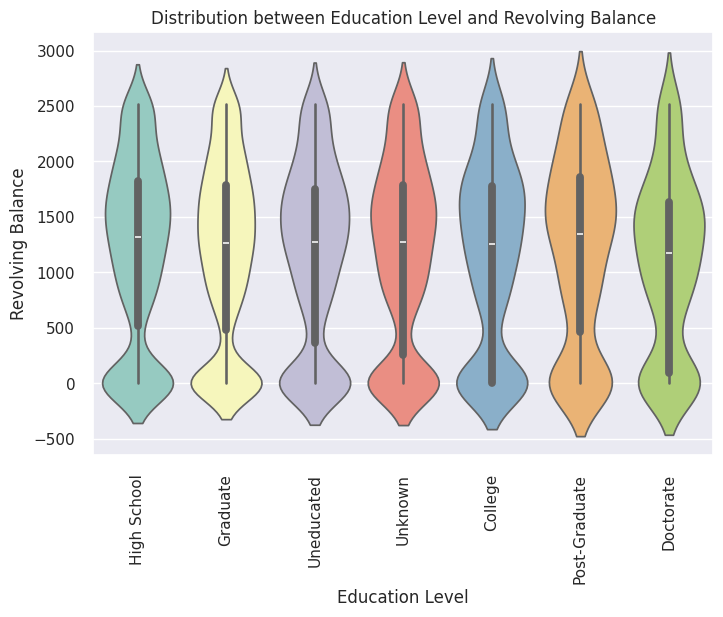

In [11]:
# Anastasiya Chuyko
sns.violinplot(
    data=df,
    x="education_level",
    y="total_revolving_bal",
    palette="Set3")
plt.xlabel("Education Level")
plt.ylabel("Revolving Balance")
plt.xticks(rotation=90)
plt.title("Distribution between Education Level and Revolving Balance");

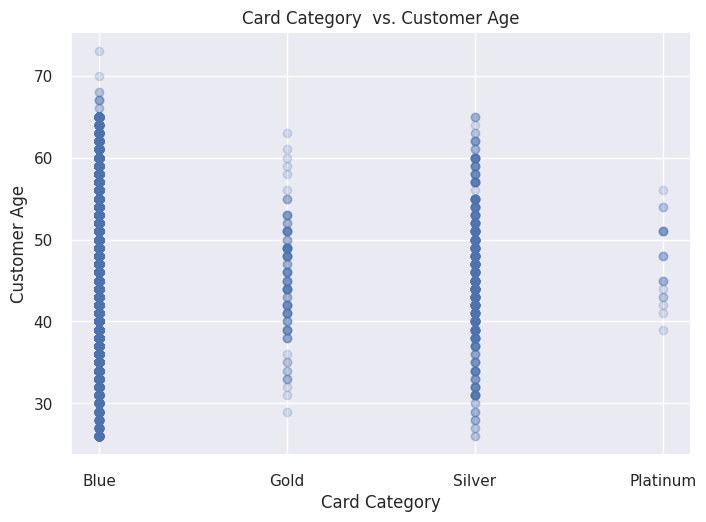

In [12]:
# Nisha Gupta
x = df["card_category"]
y = df["customer_age"]
plt.scatter(
    x=x,
    y=y,
    alpha=0.2)
plt.title("Card Category  vs. Customer Age")
plt.xlabel("Card Category")
plt.ylabel("Customer Age")
plt.show()

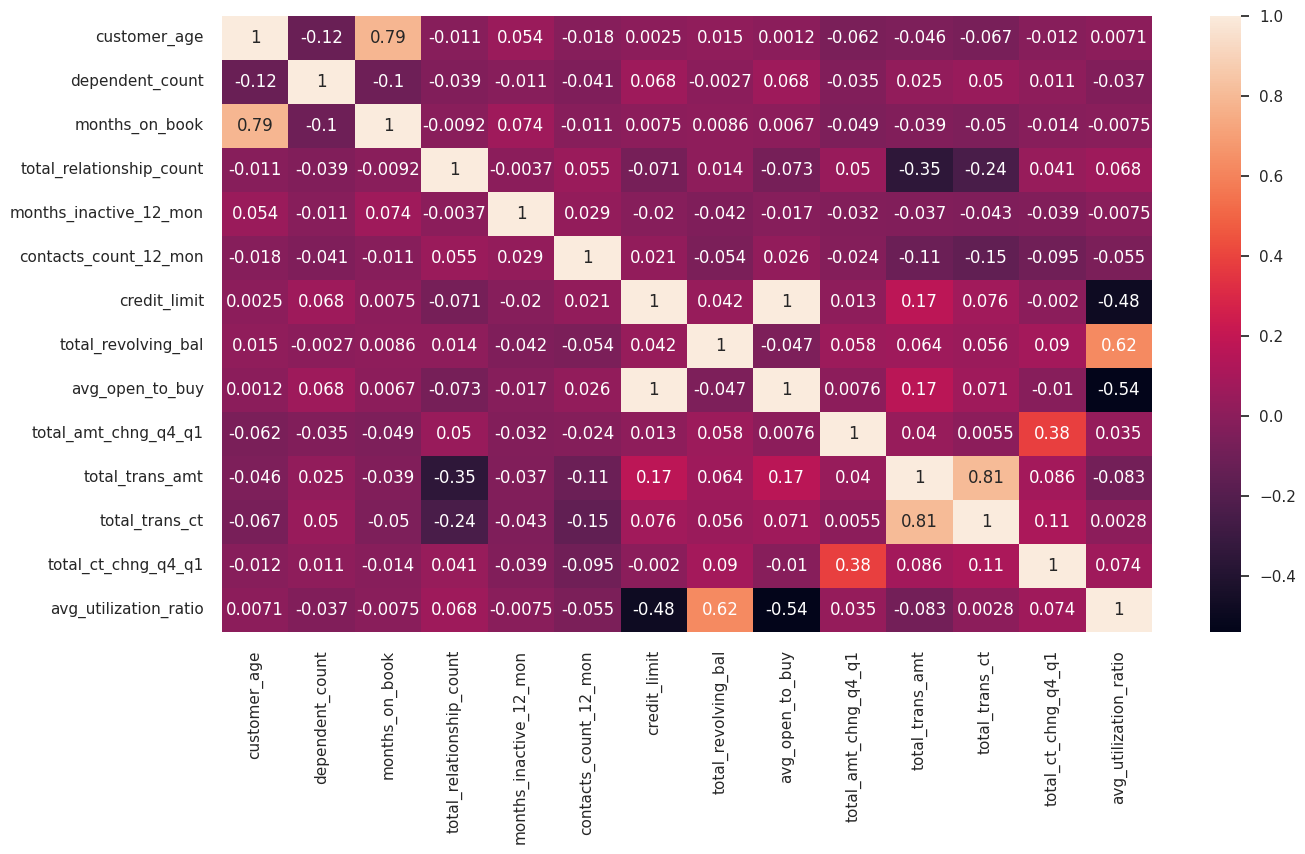

In [13]:
# Iskandar Bagirov
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True);

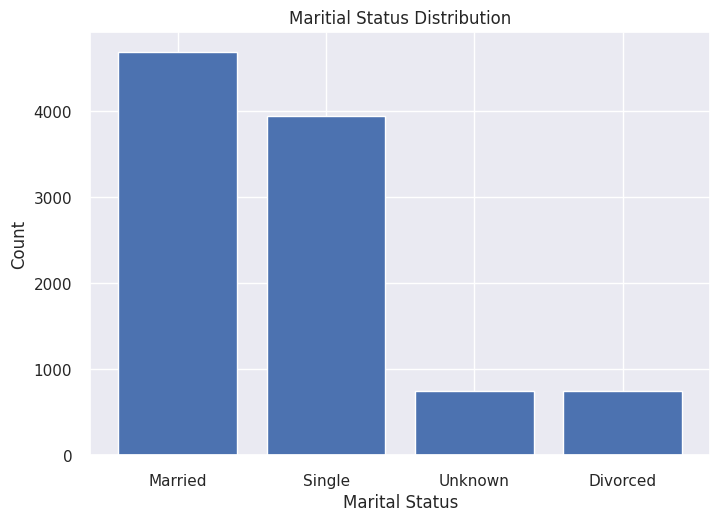

In [14]:
# Karandeep Singh
marital_status = df["marital_status"].unique()
marital_count = df["marital_status"].value_counts()

plt.bar (
    marital_status,
    marital_count
)
plt.ylabel("Count")
plt.xlabel("Marital Status")
plt.title("Maritial Status Distribution");

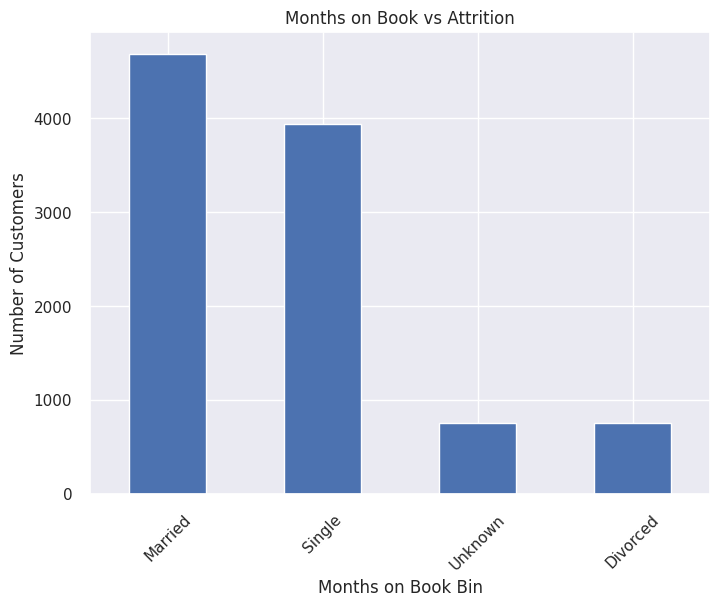

In [15]:
# Phuntsok Yolmo
marital_count.plot(kind='bar', figsize=(8, 6))
# Add chart title and axis labels
plt.title('Months on Book vs Attrition')
plt.xlabel('Months on Book Bin')
plt.ylabel('Number of Customers')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
# Display the chart
plt.show()

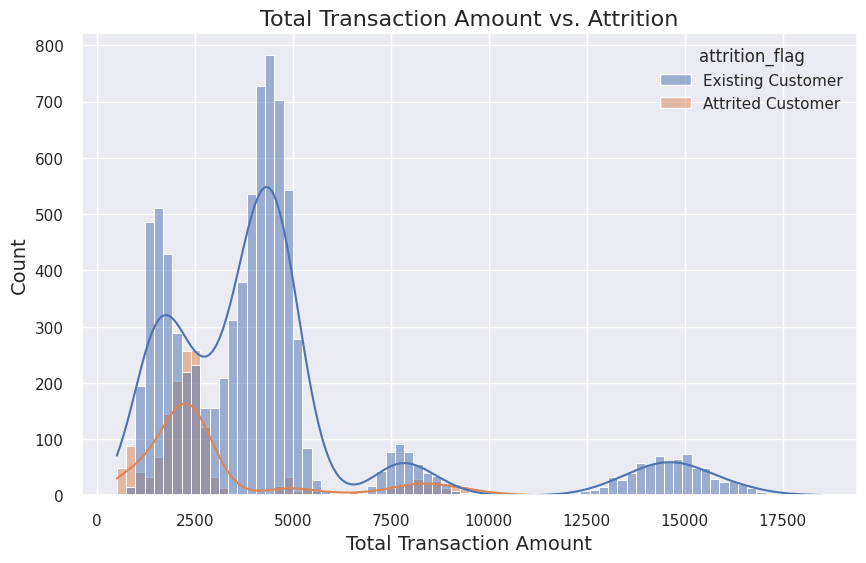

In [16]:
# Felix Gonzalez
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_trans_amt', hue='attrition_flag', kde=True)
plt.title('Total Transaction Amount vs. Attrition', fontsize=16)
plt.xlabel('Total Transaction Amount', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

#Data Preprocessing

In [17]:
# Anastasiya Chuyko
to_encode = "attrition_flag"
df = pd.get_dummies(data=df, columns=[to_encode], dtype=int, drop_first=True, prefix="Encoded")

In [18]:
# Nisha Gupta
to_encode = "gender"
df = pd.get_dummies(data=df, columns=[to_encode], dtype=int, drop_first=True, prefix="Encoded")

In [19]:
# Iskandar Bagirov
income_column = "income_category"
groups = ['$120K +', '$80K - $120K','$60K - $80K','$40K - $60K','Less than $40K', 'Unknown']
encode = OrdinalEncoder(categories=[groups])
array = encode.fit_transform(df[[income_column]])
df["income_category"] = array

In [20]:
# Karandeep Singh
education_column = "education_level"
education_groups = ["Doctorate", "Post-Graduate", "Graduate", "College", "High School", "Unknown", "Uneducated"]
encode = OrdinalEncoder(categories=[education_groups])
array = encode.fit_transform(df[[education_column]])
df["education_level"] = array

In [21]:
# Kazi Shahria
oridinal_encoder_for_card_types = OrdinalEncoder(categories=[["Platinum", "Gold", "Silver", "Blue"]])
card_type_column = np.array(df.card_category).reshape(-1, 1)
df["card_category"] = oridinal_encoder_for_card_types.fit_transform(card_type_column)

In [22]:
# Felix Gonzalez
to_encode = "marital_status"
one_hot_encoder = OneHotEncoder(drop="if_binary")
data_to_one_hot_encode = df[[to_encode]]
one_hot_encoder.fit(X=data_to_one_hot_encode)
one_hot_encoded_array = one_hot_encoder.fit_transform(df[[to_encode]]).toarray()
one_hot_encoder_column_names = np.array(["divorced", "married", "single", "unknown"])
df.drop(columns=to_encode, inplace=True)
df[one_hot_encoder_column_names] = one_hot_encoded_array

In [23]:
# Lower the columns
df.columns = df.columns.str.lower()

# Renaming the encoded columns
df.rename(columns={"encoded_existing customer": "attrition_flag", "encoded_m": "gender"}, inplace=True)

# Encoding done
df.head()

,customer_age,dependent_count,education_level,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,...,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,attrition_flag,gender,divorced,married,single,unknown
0,45,3,4.0,2.0,3.0,39,5,1,3,12691.0,...,1144,42,1.625,0.061,1,1,0.0,1.0,0.0,0.0
1,49,5,2.0,4.0,3.0,44,6,1,2,8256.0,...,1291,33,3.714,0.105,1,0,0.0,0.0,1.0,0.0
2,51,3,2.0,1.0,3.0,36,4,1,0,3418.0,...,1887,20,2.333,0.000,1,1,0.0,1.0,0.0,0.0
3,40,4,4.0,4.0,3.0,34,3,4,1,3313.0,...,1171,20,2.333,0.760,1,0,0.0,0.0,0.0,1.0
4,40,3,6.0,2.0,3.0,21,5,1,0,4716.0,...,816,28,2.500,0.000,1,1,0.0,1.0,0.0,0.0


In [24]:
# Independent Variables
X = df.drop(columns="attrition_flag")

# Dependent Variables
Y = df["attrition_flag"]

In [25]:
# Training and testing sets

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.70, random_state=42)

# ML Models

In [26]:
# Models Initalized
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [27]:
# Train the models
log_reg.fit(x_train, y_train)

LogisticRegression()

In [28]:
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
# Store the predictions
log_reg_preds = log_reg.predict(x_test)
dec_tree_preds = dec_tree.predict(x_test)
rf_preds = rf.predict(x_test)

In [31]:
# Get accuracy score
log_reg_score = accuracy_score(y_true=y_test, y_pred=log_reg_preds)
dec_tree_score = accuracy_score(y_true=y_test, y_pred=dec_tree_preds)
rf_score = accuracy_score(y_true=y_test, y_pred=rf_preds)

In [32]:
print(f"ML Model Accuracy Scores")
print(f"Logistic Regression: {round(log_reg_score, 3)}")
print(f"Decision Tree: {round(dec_tree_score, 3)}")
print(f"Random Forest: {round(rf_score, 3)}")

ML Model Accuracy Scores
Logistic Regression: 0.883
Decision Tree: 0.929
Random Forest: 0.956


In [33]:
# Using Pycaret
setup(data=df, target="attrition_flag");

,Description,Value
0,Session id,2678
1,Target,attrition_flag
2,Target type,Binary
3,Original data shape,"(10127, 23)"
4,Transformed data shape,"(10127, 23)"
5,Transformed train set shape,"(7088, 23)"
6,Transformed test set shape,"(3039, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


In [34]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9731,0.9940,0.9882,0.9799,0.9840,0.8982,0.8987,0.4410
lightgbm,Light Gradient Boosting Machine,0.9728,0.9943,0.9874,0.9803,0.9838,0.8975,0.8979,2.1330
gbc,Gradient Boosting Classifier,0.9656,0.9895,0.9889,0.9706,0.9797,0.8670,0.8687,1.9270
rf,Random Forest Classifier,0.9604,0.9880,0.9864,0.9671,0.9766,0.8460,0.8484,1.0900
ada,Ada Boost Classifier,0.9577,0.9846,0.9797,0.9702,0.9749,0.8396,0.8405,0.7110
et,Extra Trees Classifier,0.9383,0.9810,0.9904,0.9394,0.9642,0.7416,0.7559,0.6520
dt,Decision Tree Classifier,0.9375,0.8854,0.9622,0.9634,0.9627,0.7689,0.7695,0.0890
lda,Linear Discriminant Analysis,0.9034,0.9225,0.9610,0.9266,0.9435,0.6110,0.6163,0.0530
nb,Naive Bayes,0.8997,0.8751,0.9514,0.9307,0.9409,0.6090,0.6115,0.0460
ridge,Ridge Classifier,0.8981,0.9225,0.9817,0.9050,0.9418,0.5397,0.5709,0.0710


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [35]:
rf = create_model("rf")

evaluate_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9619,0.9858,0.9882,0.9671,0.9776,0.8521,0.8542
1,0.9506,0.9814,0.9832,0.9590,0.9710,0.8068,0.8096
2,0.9563,0.9900,0.9866,0.9623,0.9743,0.8289,0.8317
3,0.9647,0.9905,0.9916,0.9672,0.9793,0.8620,0.8650
4,0.9619,0.9935,0.9899,0.9656,0.9776,0.8510,0.8539
5,0.9605,0.9917,0.9882,0.9655,0.9767,0.8460,0.8485
6,0.9704,0.9899,0.9849,0.9799,0.9824,0.8891,0.8892
7,0.9535,0.9916,0.9899,0.9562,0.9727,0.8137,0.8194
8,0.9746,0.9870,0.9832,0.9865,0.9848,0.9059,0.9060


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Model Optimization

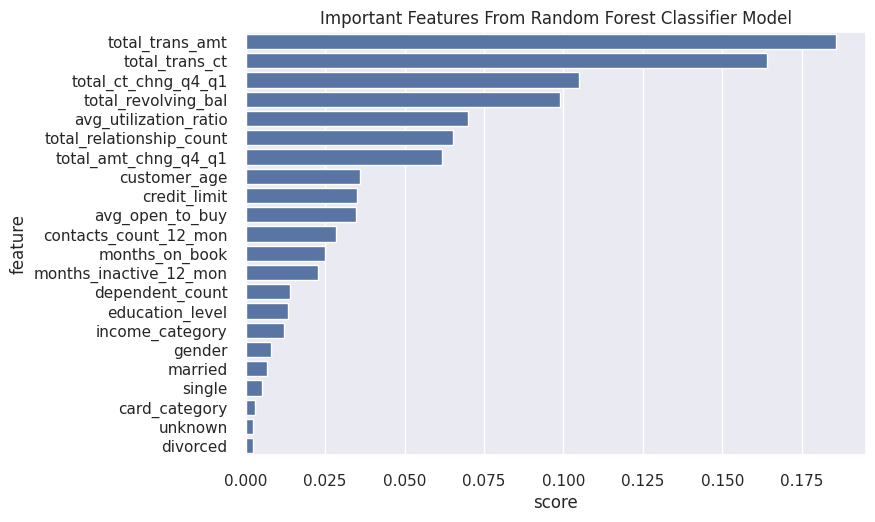

In [36]:
important_features = rf.feature_importances_

features_to_use = {}
for i in range(len(X.columns)):
    features_to_use[X.columns[i]] = important_features[i]

important_features = sorted(features_to_use.items(), key=lambda x:x[1], reverse=True)
important_features = pd.DataFrame(important_features, columns=["feature", "score"])

plt.title("Important Features From Random Forest Classifier Model")
sns.barplot(data=important_features, x="score", y="feature");

In [37]:
features_to_use = ["customer_age", "months_on_book", "total_relationship_count", "total_trans_amt", "total_trans_ct", "total_revolving_bal", "credit_limit", "avg_utilization_ratio"]
X = X[features_to_use]
X.head()

,customer_age,months_on_book,total_relationship_count,total_trans_amt,total_trans_ct,total_revolving_bal,credit_limit,avg_utilization_ratio
0,45,39,5,1144,42,777,12691.0,0.061
1,49,44,6,1291,33,864,8256.0,0.105
2,51,36,4,1887,20,0,3418.0,0.000
3,40,34,3,1171,20,2517,3313.0,0.760
4,40,21,5,816,28,0,4716.0,0.000


In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.70, random_state=42)

rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=2678, verbose=0,
                       warm_start=False)

# Classification Metrics

In [39]:
# Store predictions
y_pred = rf.predict(x_test)

In [40]:
score = accuracy_score(y_true=y_test, y_pred=y_pred) * 100
print(f"{round(score, 2)}% of the predictions are correct!")

94.67% of the predictions are correct!


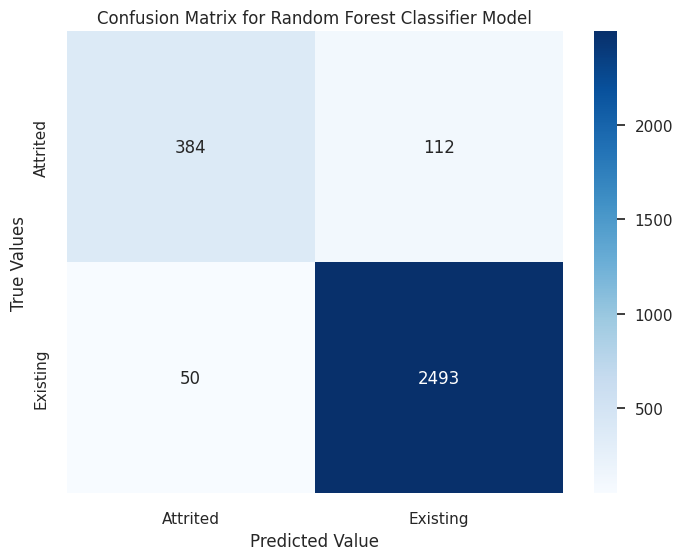

In [41]:
plt.figure(figsize=(8, 6))

matrix = confusion_matrix(y_test, y_pred)

plt.title("Confusion Matrix for Random Forest Classifier Model")
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")

new_labels = ["Attrited", "Existing"]
class_labels = [0.5, 1.5]
plt.xticks(class_labels, new_labels)
plt.yticks(class_labels, new_labels)
plt.ylabel("True Values")
plt.xlabel("Predicted Value")
plt.show()

In [42]:
report = classification_report(y_true=y_test, y_pred=y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.77      0.83       496
           1       0.96      0.98      0.97      2543

    accuracy                           0.95      3039
   macro avg       0.92      0.88      0.90      3039
weighted avg       0.95      0.95      0.95      3039



# Save The Model

In [43]:
dump(rf, "model.joblib")

['model.joblib']